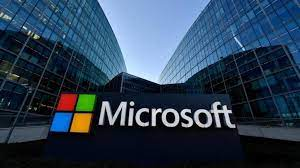

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Read Data


In [ ]:
df=pd.read_csv('../input/microsoft-stock-data/MSFT.csv')

In [ ]:
df.head(10)

# Getting to Know The Data

In [ ]:
df.shape

In [ ]:
df.info()

# Showing Basics Statistics
**Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with .describe():**


In [ ]:
df.describe()

**.describe() won’t try to calculate a mean or a standard deviation for the object columns, since they mostly include text strings. However, it will still display some descriptive statistics**

In [ ]:
df.describe(include=object)

In [ ]:
df["High"].value_counts()

In [ ]:
df["Low"].value_counts()

In [ ]:
df["Close"].value_counts()

In [ ]:
df["Volume"].value_counts()

In [ ]:
current_decade =df[df["Low"] > 0.091146]
current_decade

In [ ]:
current_decade =df[df["High"] > 0.098090]
current_decade

In [ ]:
print('Max is:',df.max())
print('Sum is:',df.sum())
print('Mean is:',df.mean())

In [ ]:
games_with_notes = df[df["Low"].notnull()]
games_with_notes.shape


In [ ]:
df.isnull().count().plot.bar()

In [ ]:
ax=sns.regplot(x='High',y='Low',data=df)


In [ ]:
p = df['High'].value_counts()
print(p)
df['Low'].value_counts().plot.bar()

In [ ]:
sns.countplot(data=df, x='Volume')

In [ ]:
sns.jointplot(x = 'High', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

In [ ]:
sns.jointplot(x = 'Low', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

In [ ]:
sns.jointplot(x = 'Close', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [ ]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='High',y='Volume',data=df)


In [ ]:
X = df[['Open', 'High', 'Low','Close','Adj Close']]
y = df['Volume']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions1))
print('\n')
print(confusion_matrix(y_test,predictions1))

In [ ]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr